 Convolutional neural networks (CNNs) is typycally  used for computer vision (detecting patterns in visual data).

## Get the Data


Download the pizza_steak subset .zip file and unzip it.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-08 05:15:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  29.9MB/s    in 3.5s    

2023-08-08 05:15:17 (29.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)



Our Data is already split into train and test category
Let's inspect each of the directories we've downloaded.
using ls command

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


Lets try to see what is in pizza directory

In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

Lets walk through this data and see how much element each directory have

We will import the helper function from my repo

In [5]:
!wget https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-functions/TensorFlow/helper_functions.py

--2023-08-08 05:15:18--  https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-functions/TensorFlow/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14169 (14K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  13.84K  --.-KB/s    in 0s      

2023-08-08 05:15:19 (92.4 MB/s) - ‘helper_functions.py’ saved [14169/14169]



In [6]:
from helper_functions import walk_through_dir

In [7]:
walk_through_dir("pizza_steak")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [8]:
# Another way
import os
len(os.listdir("pizza_steak/train/steak"))

750

In [9]:
len(os.listdir("pizza_steak/test/steak"))

250

In [10]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

LEts view random image

In [11]:
# Importing view image helper function
from helper_functions import view_random_image

Image shape: (383, 512, 3)


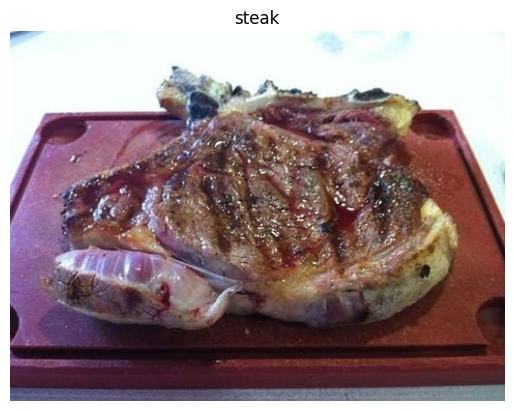

In [12]:
img = view_random_image("pizza_steak/train/", "steak")

In [13]:
# view image in tensor form
img

array([[[197, 225, 255],
        [189, 217, 254],
        [176, 204, 244],
        ...,
        [234, 250, 249],
        [231, 250, 248],
        [230, 249, 247]],

       [[152, 180, 219],
        [142, 172, 210],
        [128, 156, 196],
        ...,
        [234, 250, 249],
        [231, 250, 248],
        [231, 250, 248]],

       [[ 92, 121, 161],
        [ 85, 117, 156],
        [ 81, 110, 150],
        ...,
        [236, 252, 251],
        [235, 251, 250],
        [234, 250, 249]],

       ...,

       [[ 92,  98, 134],
        [ 93,  99, 135],
        [ 94, 100, 136],
        ...,
        [116, 138, 135],
        [114, 136, 133],
        [111, 133, 130]],

       [[ 93,  98, 136],
        [ 91,  99, 135],
        [ 94,  99, 137],
        ...,
        [118, 140, 137],
        [117, 139, 136],
        [112, 137, 133]],

       [[ 98, 106, 145],
        [ 96, 106, 142],
        [ 98, 106, 145],
        ...,
        [114, 139, 135],
        [112, 137, 133],
        [109, 136, 131]]

In [14]:
img.shape

(383, 512, 3)

Lets Normalise the image

In [15]:
# Pixels values between 0 and 1
img/255.

array([[[0.77254902, 0.88235294, 1.        ],
        [0.74117647, 0.85098039, 0.99607843],
        [0.69019608, 0.8       , 0.95686275],
        ...,
        [0.91764706, 0.98039216, 0.97647059],
        [0.90588235, 0.98039216, 0.97254902],
        [0.90196078, 0.97647059, 0.96862745]],

       [[0.59607843, 0.70588235, 0.85882353],
        [0.55686275, 0.6745098 , 0.82352941],
        [0.50196078, 0.61176471, 0.76862745],
        ...,
        [0.91764706, 0.98039216, 0.97647059],
        [0.90588235, 0.98039216, 0.97254902],
        [0.90588235, 0.98039216, 0.97254902]],

       [[0.36078431, 0.4745098 , 0.63137255],
        [0.33333333, 0.45882353, 0.61176471],
        [0.31764706, 0.43137255, 0.58823529],
        ...,
        [0.9254902 , 0.98823529, 0.98431373],
        [0.92156863, 0.98431373, 0.98039216],
        [0.91764706, 0.98039216, 0.97647059]],

       ...,

       [[0.36078431, 0.38431373, 0.5254902 ],
        [0.36470588, 0.38823529, 0.52941176],
        [0.36862745, 0

# Creating  a CNN model




In [16]:
import tensorflow as tf
tf.__version__

'2.12.0'

Firstly pre process data to be used for the model

Normalise, create batch sizes, ...

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# Preprocess data
train_data_gen = ImageDataGenerator(rescale=1./255)
valid_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory("pizza_steak/train/",
                                                batch_size=32,  #number of images to precess at a time
                                                target_size=(224, 224), # size to be 224 x 224
                                                class_mode="binary", # type of problem (binary for 2)
                                                seed=42)
valid_data = valid_data_gen.flow_from_directory("pizza_steak/test/",
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)



In [19]:
# set ranodom seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size= 3, # can be (3, 3)
                           activation="relu",
                           input_shape=(224, 224, 3)), # first layer is for input
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")   # Binary activation fun
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data)
            )



Epoch 1/5
47/47 [==============================] - 21s 161ms/step - loss: 0.6482 - accuracy: 0.6040 - val_loss: 0.6091 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 7s 152ms/step - loss: 0.5710 - accuracy: 0.7000 - val_loss: 0.4851 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4824 - accuracy: 0.7687 - val_loss: 0.3653 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3868 - accuracy: 0.8267 - val_loss: 0.3207 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3251 - accuracy: 0.8700 - val_loss: 0.2662 - val_accuracy: 0.8860


Accuracy almost 88%

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Creating  models without CNN

To see if the models work better or worse without CNN

In [21]:
# set random seed
tf.random.set_seed(42)

#Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])

# compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 133ms/step - loss: 0.6978 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000


Only 50% accuracy, means model is guessing (in binary )

In [22]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


NUmber of params increased in model_2, but still the accuracy is lower than that of model_1

1. Increase number of neurons (hidden units in the layer, 4->100)
2. Increase the number of layers

In [23]:
#set random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 144ms/step - loss: 2.7209 - accuracy: 0.6513 - val_loss: 1.0284 - val_accuracy: 0.6000
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.8178 - accuracy: 0.6940 - val_loss: 0.5310 - val_accuracy: 0.7060
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.5795 - accuracy: 0.7300 - val_loss: 0.4358 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.7792 - accuracy: 0.7133 - val_loss: 0.6044 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.5606 - accuracy: 0.7587 - val_loss: 0.5007 - val_accuracy: 0.7780


Accuracy is around 75%, it worked better than model_2

In [24]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Still doesnt outperform model_1

Thats why CNN is used for classification